In [14]:
## This code fit and evaluate different models in the diabetes dataset
## Note: I will write the imports in the cells they are used instead of the first cell,
## to ease visualization

In [15]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# load the data
diabetes = datasets.load_diabetes()
X = diabetes.data
print('Data size: ', X.shape)
y = diabetes.target
print('Output size: ', y.shape)

# split the data in training, validation and test sets
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X, y, test_size = 0.1, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size = 0.1, random_state=7)

print('# training samples: ', X_train.shape[0])
print('# validation samples: ', X_val.shape[0])
print('# test samples: ', X_test.shape[0])

Data size:  (442, 10)
Output size:  (442,)
# training samples:  357
# validation samples:  40
# test samples:  45


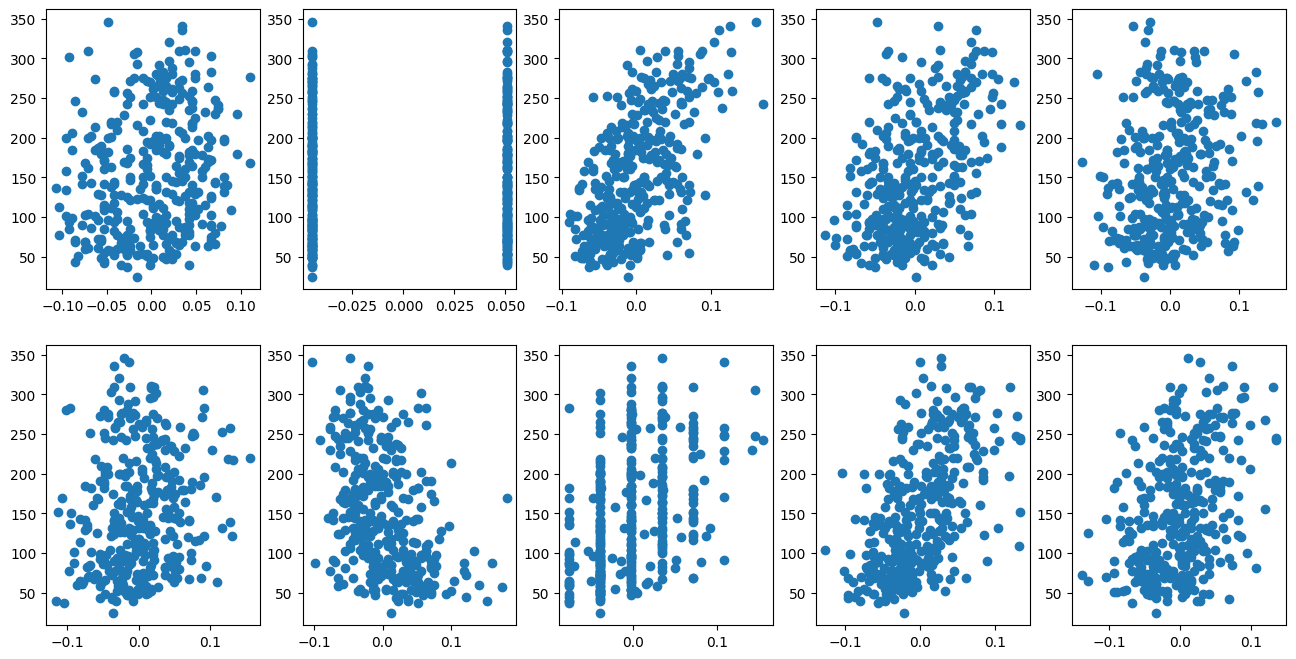

In [16]:
# inspect the data: visualize relations between each dimension of the feature vector and the output
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.scatter(X_train[:,i],y_train)

In [17]:
from scipy.stats import pearsonr

# inspect the data: compute correlation coefficient between each dimension of the feature vector and the output
for i in range(10):
  corr, _ = pearsonr(X_train[:,i],y_train)
  print(corr)

0.18435322077428717
0.04047564703879276
0.5924313146155405
0.4738845800954919
0.1970432619251796
0.1569575756862509
-0.38808569389595454
0.41654762931749806
0.5490383400796034
0.36235773907744223


In [18]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score # more metrics available at
#https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.preprocessing import StandardScaler

# The data is already scaled, no need to scale again
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_val = scaler.transform(X_val)
#X_test = scaler.transform(X_test)

# Fit a linear regression model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
# Predict output for the validation data
y_val_predicted = lr.predict(X_val)
# Compute metrics in the validation data
mse_val = mean_squared_error(y_val, y_val_predicted)
print('MSE (validation set) linear model: {}'.format(mse_val))
r2_val = r2_score(y_val, y_val_predicted)
print('R2 (validation set) linear model: {}'.format(r2_val))
ev_val = explained_variance_score(y_val, y_val_predicted)
print('Explained variance (validation set) linear model: {}'.format(ev_val))
# Print the model coefficients
print('Model coefficients: ', lr.coef_)

MSE (validation set) linear model: 3841.802890399501
R2 (validation set) linear model: 0.44960060824982406
Explained variance (validation set) linear model: 0.4574870728043364
Model coefficients:  [ -26.46875105 -223.91490265  549.46894289  386.09018492 -729.9880354
  445.93971163   97.14063517  146.79496325  720.23036861   17.24003252]


In [19]:
# Fit a Lasso model
lss_lambda=1.0
lss = linear_model.Lasso(lss_lambda)
lss.fit(X_train, y_train)
# Predict output for the validation data
y_val_predicted = lss.predict(X_val)
# Compute metrics in the validation data
mse_val = mean_squared_error(y_val, y_val_predicted)
print('MSE (validation set) Lasso model: {}'.format(mse_val))
r2_val = r2_score(y_val, y_val_predicted)
print('R2 (validation set) Lasso model: {}'.format(r2_val))
# Print the model coefficients, just to see the sparsity
print('Model coefficients: ', lss.coef_)

MSE (validation set) Lasso model: 4641.160580617451
R2 (validation set) Lasso model: 0.3350799003847117
Model coefficients:  [  0.          -0.         372.76945518  66.24266422   0.
   0.          -0.           0.         263.23756546   0.        ]


In [20]:
from sklearn.preprocessing import PolynomialFeatures

# Transform feature vectors
max_degree = 2
poly = PolynomialFeatures(max_degree)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.fit_transform(X_val)
X_test_poly = poly.fit_transform(X_test)
# Fit a poynomial regression model
lrpol = linear_model.LinearRegression()
lrpol.fit(X_train_poly, y_train)
# Predict output for the validation data
y_val_predicted = lrpol.predict(X_val_poly)
# Compute metrics in the validation data
mse_val = mean_squared_error(y_val, y_val_predicted)
print('MSE (validation set) linear model: {}'.format(mse_val))
r2_val = r2_score(y_val, y_val_predicted)
print('R2 (validation set) linear model: {}'.format(r2_val))

print(lrpol.coef_)

MSE (validation set) linear model: 38513.65
R2 (validation set) linear model: -4.517693160951014
[ 2.18096132e+17 -2.12738207e+01  2.57367271e+02  5.84794150e+02
 -2.05729955e+02 -6.91359825e+04  6.03821792e+04  2.70029256e+04
  1.67044806e+03  2.42810700e+04 -1.83827661e+01 -2.98614871e+04
  9.69658425e+03  3.37659285e+04 -3.01792615e+04  2.79621390e+04
 -7.31344530e+04  4.31848065e+04  6.09003222e+04  2.63252727e+04
  1.32909532e+04  1.55410771e+00  9.29781927e+03  5.90737551e+03
 -4.11850438e+04  9.40091224e+03 -1.89292482e+03  3.05261067e+04
  6.52284840e+03 -2.68276903e+03 -1.36654189e+03  1.14643529e+04
  3.24506241e+04 -1.44242499e+04 -2.98959816e+04 -2.49859227e+04
 -5.51079079e+03 -1.32072615e+04  2.37750112e+03 -8.14257229e+04
  9.37040142e+04  5.75599221e+04  2.58337117e+03  1.93325015e+04
 -1.49416105e+04 -1.08134194e+05 -2.74060540e+04 -1.43242145e+05
  1.11090120e+05  8.68668046e+04 -7.22278837e+04  1.12824727e+05
  1.84533108e+05 -9.38206911e+04 -2.28245995e+04  5.322203

In [21]:
# Fit a ridge model
ridge = linear_model.Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
# Predict output for the validation data
y_val_predicted = ridge.predict(X_val)
# Compute metrics in the validation data
mse_val = mean_squared_error(y_val, y_val_predicted)
print('MSE (validation set) linear model: {}'.format(mse_val))
r2_val = r2_score(y_val, y_val_predicted)
print('R2 (validation set) linear model: {}'.format(r2_val))

MSE (validation set) linear model: 3962.7835964234064
R2 (validation set) linear model: 0.4322681971634915


## **Huber**

In [22]:
# Fit a Huber model
huber = linear_model.HuberRegressor()
huber.fit(X_train,y_train)
# Predict output for the validation data
y_val_predicted = huber.predict(X_val)
# Compute metrics in the validation data
mse_val = mean_squared_error(y_val, y_val_predicted)
print('MSE (validation set) linear model: {}'.format(mse_val))
r2_val = r2_score(y_val, y_val_predicted)
print('R2 (validation set) linear model: {}'.format(r2_val))

MSE (validation set) linear model: 3849.684669744608
R2 (validation set) linear model: 0.44847141795005696


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [23]:
# Fit a RANSAC model
ransac = linear_model.RANSACRegressor()
ransac.fit(X_train,y_train)
# Predict output for the validation data
y_val_predicted = ransac.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_predicted)
# Compute metrics in the validation data
print('MSE (validation set) linear model: {}'.format(mse_val))
r2_val = r2_score(y_val, y_val_predicted)
print('R2 (validation set) linear model: {}'.format(r2_val))

MSE (validation set) linear model: 5771.068756349157
R2 (validation set) linear model: 0.17320257601432687


In [24]:
from sklearn.neighbors import KNeighborsRegressor
# Fit a NN model
n_neighbors = 1
knn = KNeighborsRegressor(n_neighbors)
knn.fit(X_train,y_train)
# Predict output for the validation data
y_val_predicted = knn.predict(X_val)
# Compute metrics in the validation data
mse_val = mean_squared_error(y_val, y_val_predicted)
print('MSE (validation set) linear model: {}'.format(mse_val))
r2_val = r2_score(y_val, y_val_predicted)
print('R2 (validation set) linear model: {}'.format(r2_val))

MSE (validation set) linear model: 5295.375
R2 (validation set) linear model: 0.24135327547061947


In [25]:
from sklearn.model_selection import cross_val_score

# Do a k-fold cross-validation using sklearn
lr = linear_model.LinearRegression()
scores = cross_val_score(lr, X, y, cv=10, scoring='r2')
print(scores)
print("Linear Regression: %0.2f mean R2 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

huber = linear_model.HuberRegressor()
huber.max_iter = 1000*huber.max_iter
scores = cross_val_score(huber, X, y, cv=10, scoring='r2')
print(scores)
print("Huber Regression: %0.2f mean R2 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.5561455  0.23055827 0.35357673 0.62190752 0.2658727  0.61819798
 0.41815142 0.43513747 0.43436229 0.68569253]
Linear Regression: 0.46 mean R2 with a standard deviation of 0.15
[0.56580941 0.25377657 0.36757052 0.60227912 0.25937094 0.61847759
 0.42100536 0.39554226 0.41673057 0.69436974]
Huber Regression: 0.46 mean R2 with a standard deviation of 0.15


In [26]:
# Finally, what is the expected r2 metric in new data?
# Fit a linear model WITH THE TRAIN AND VALIDATION DATA
lr = linear_model.LinearRegression()
lr.fit(X_train_and_val, y_train_and_val)
# Predict output for the TEST data
y_test_predicted = lr.predict(X_test)
# Compute metrics in the TEST data
mse_test = mean_squared_error(y_test, y_test_predicted)
print('MSE (test set) linear model: {}'.format(mse_test))
r2_test = r2_score(y_test, y_test_predicted)
print('R2 (test set) linear model: {}'.format(r2_test))

MSE (test set) linear model: 2990.8379694968658
R2 (test set) linear model: 0.46359832995912165
